In [13]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import mplhep
mplhep.style.use(mplhep.style.ROOT)
plt.rcParams.update({'font.size': 16,
                        'grid.linestyle': '--',
                        'axes.grid': True,
                        'figure.autolayout': True,
                        'figure.figsize': [14,6]
                        })


In [14]:
# run = 38930
# run = 39296
# run = 39108
run = 39111

#load the csv file from public directory and create the pandas DataFrame
saturation_file_cathode = f"/eos/experiment/neutplatform/protodune/experiments/ProtoDUNE-VD/beam_csv_files/pe_info_cathode_run{run:06d}.csv"
saturation_file_membrane = f"/eos/experiment/neutplatform/protodune/experiments/ProtoDUNE-VD/beam_csv_files/pe_info_membrane_run{run:06d}.csv"
dfc = pd.read_csv(saturation_file_cathode, sep=",")
dfm = pd.read_csv(saturation_file_membrane, sep=",")
dfall = pd.read_csv(f"/afs/cern.ch/work/h/hvieirad/public/np02_light_response_data/pe_info_all.csv", sep=",")

In [15]:
df = pd.merge(dfc, dfm, on=["Run", "CH"], suffixes=("_C","_M"))
df["SUM"] = df["SUM_C"] + df["SUM_M"]

In [16]:
#filter the DataFrame creating another one just for the selected run
df_run = df[df.iloc[:, 0] == run] #df based on the specific run
df_run.to_csv("finaltable.tsv", sep="\t", index=False)
df_run.to_clipboard(index=False, sep='\t')
df_run

,Run,CH,C1,C2,C3,C4,C5,C6,C7,C8,...,M1,M2,M3,M4,M5,M6,M7,M8,SUM_M,SUM
0,39111,total,844.86,738.93,2374.58,1933.66,720.84,1806.77,1097.28,2067.57,...,327.23,254.00,-169.54,328.31,82.02,73.93,53.68,143.03,1192.62,8513.77
1,39111,HL,808.88,728.18,2234.02,1891.55,619.80,1441.34,861.79,1634.59,...,310.87,255.64,-232.97,309.25,66.64,72.67,48.68,157.82,1104.16,7959.60
2,39111,HLx,1252.99,325.28,1248.96,2117.73,329.39,448.42,394.30,671.49,...,427.95,425.69,257.84,666.74,0.00,134.68,53.01,27.14,2218.61,6353.68
3,39111,HxLx,1366.73,917.41,4514.86,2665.10,1964.40,4747.01,3836.77,6534.71,...,557.63,161.22,241.13,288.52,249.68,71.41,90.36,88.33,2284.23,17185.49


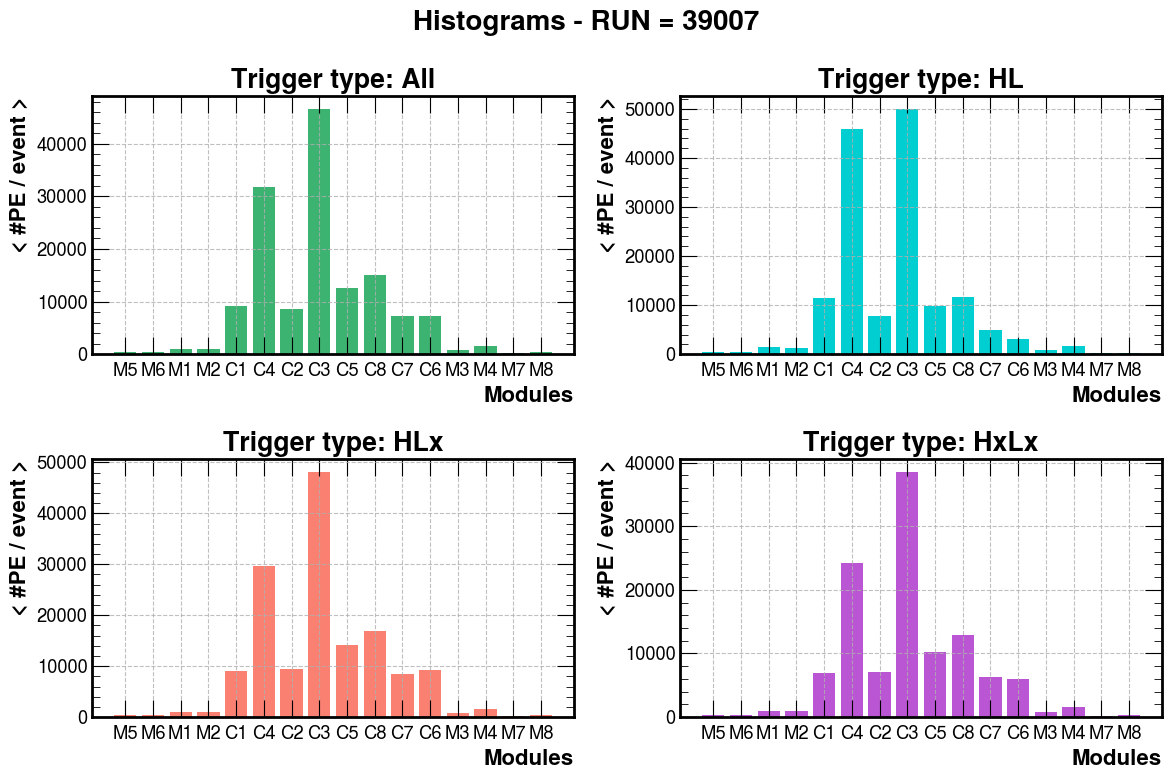

In [6]:
'''
HISTOGRAMS IN 2D - ALL TRIGGERS FOR THE CHOSEN RUN
'''
#si potrebbe migliorare mettendo le variabili in una lista e facendo un ciclo for ma non ho il tempo per pensarci :)


# Not used anymore for automatic
# #type of particle selected by all the Cherenkov triggers
part_total = df_run.iloc[0]['CH']
part_HL = df_run.iloc[1]['CH']
part_HLx = df_run.iloc[2]['CH']
part_HxLx = df_run.iloc[3]['CH']

#exctract the name of the modules from the DataFrame
#modules = df.columns[7:-1].tolist()
modules = ['M5', 'M6', 'M1', 'M2', 'C1', 'C4', 'C2', 'C3', 'C5', 'C8', 'C7', 'C6', 'M3', 'M4', 'M7', 'M8']

dofraction = False

#exctraction of the #pe for each module of each ch_trigger as an array
pes_total = []
pes_HL = []
pes_HLx = []
pes_HxLx = []
for x in modules:
    pes_total.append(df_run.loc[df['CH'] == "total"][x].values[0])
    pes_HL.append(df_run.loc[df['CH'] == "HL"][x].values[0])
    pes_HLx.append(df_run.loc[df['CH'] == "HLx"][x].values[0])
    pes_HxLx.append(df_run.loc[df['CH'] == "HxLx"][x].values[0])
    if dofraction:
        pes_total[-1] = pes_total[-1]*100/df_run.loc[df['CH'] == "total"]['SUM'].values[0]
        pes_HL[-1] = pes_HL[-1]*100/df_run.loc[df['CH'] == "HL"]['SUM'].values[0]
        pes_HLx[-1] = pes_HLx[-1]*100/df_run.loc[df['CH'] == "HLx"]['SUM'].values[0]
        pes_HxLx[-1] = pes_HxLx[-1]*100/df_run.loc[df['CH'] == "HxLx"]['SUM'].values[0]

pes_total = np.array(pes_total)
pes_HL = np.array(pes_HL)
pes_HLx = np.array(pes_HLx)
pes_HxLx = np.array(pes_HxLx)

#histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

def hist2D(x_coo, y_coo, pes_type, ch_type, col):
    if ch_type == "Total":
        ch_type = 'All'
        
    axs[x_coo, y_coo].set_title('Trigger type: {:}'.format(ch_type), fontweight='bold')
    # axs[x_coo, y_coo].grid(color='gray', linestyle='-.', linewidth=0.5, alpha=0.3)
    axs[x_coo, y_coo].bar(modules, pes_type, color=col)
    axs[x_coo, y_coo].set_xlabel('Modules', fontweight='bold')
    axs[x_coo, y_coo].set_ylabel('< #PE / event >', fontweight='bold')
    if dofraction:
        axs[x_coo, y_coo].set_ylabel('Fraction [%]', fontweight='bold')
    axs[x_coo, y_coo].tick_params(axis='x', which='minor', bottom=False, top=False)

hist2D(0, 0, pes_total, 'Total', 'mediumseagreen')
hist2D(0, 1, pes_HL, 'HL', 'darkturquoise')
hist2D(1, 0, pes_HLx, 'HLx', 'salmon')
hist2D(1, 1, pes_HxLx, 'HxLx', 'mediumorchid')


plt.suptitle('Histograms - RUN = {:}'.format(run), fontweight='bold', fontsize=20)
plt.tight_layout()
#plt.savefig('/afs/cern.ch/work/l/liacob/public/saturation_hist/{:}_2DHist.png'.format(run))

Text(0, 1, '#pe/event')

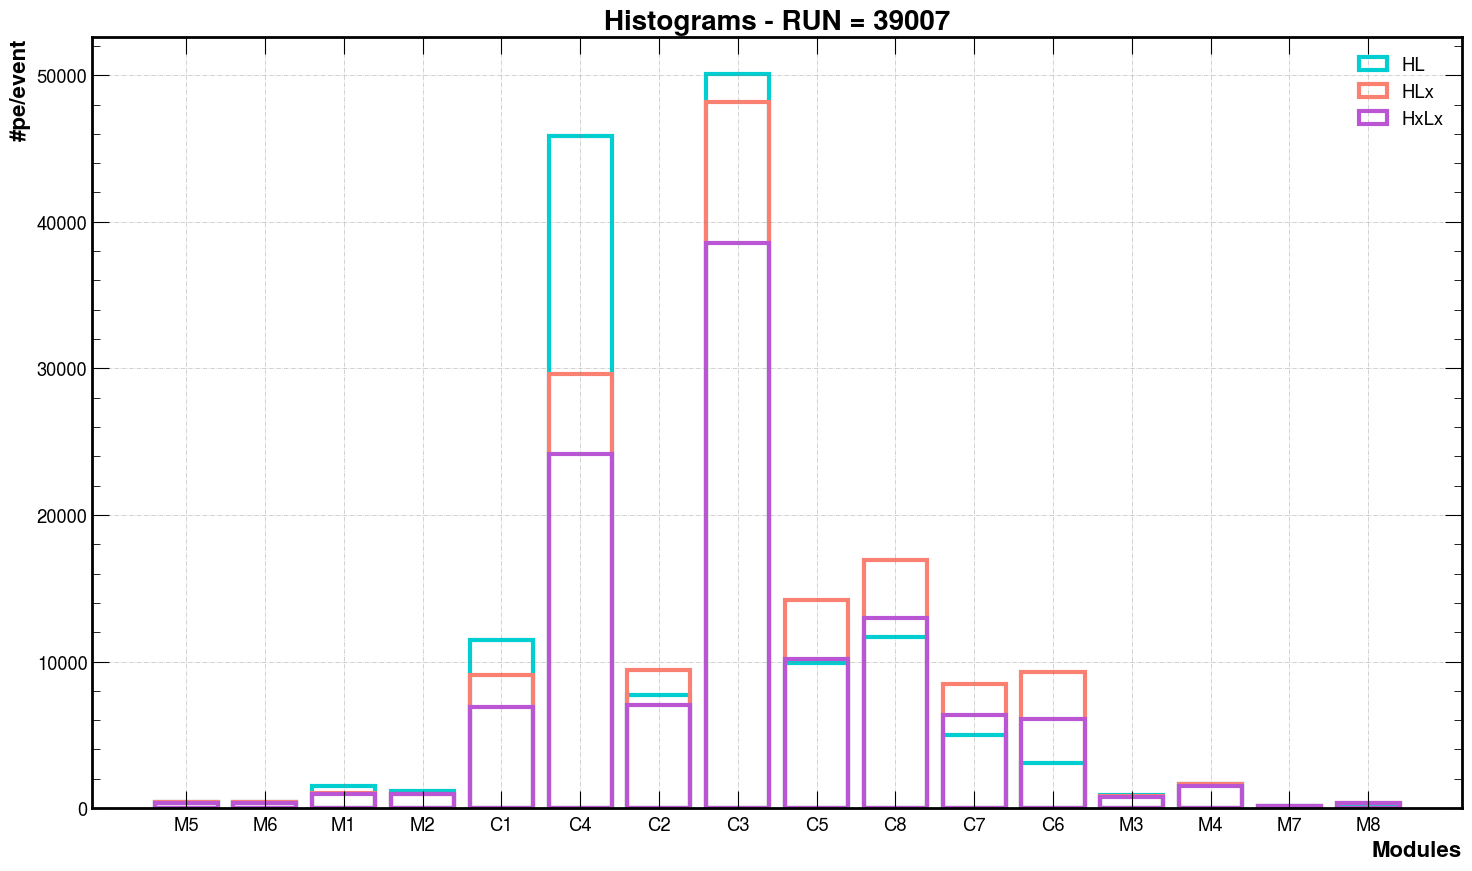

In [7]:
'''
HISTOGRAMS (BAR) IN 2D - ALL TRIGGERS FOR THE CHOSEN RUN TOGETHER FOR STATISTICS COMPARISON
'''

plt.figure(figsize=(15,9))
plt.title('Histograms - RUN = {:}'.format(run), fontweight='bold', fontsize=20)
plt.grid(color='gray', linestyle='-.', linewidth=0.5, alpha=0.5)
plt.bar(modules, pes_HL, linewidth=3, edgecolor='darkturquoise', fill=False, label='{:}'.format('HL'))
plt.bar(modules, pes_HLx, linewidth=3, edgecolor='salmon', fill=False, label='{:}'.format('HLx'))
plt.bar(modules, pes_HxLx, linewidth=3, edgecolor='mediumorchid', fill=False, label='{:}'.format('HxLx'))
plt.gca().tick_params(axis='x', which='minor', bottom=False, top=False)
plt.legend()
plt.xlabel('Modules', fontweight='bold')
plt.ylabel('#pe/event', fontweight='bold')
#plt.savefig('/afs/cern.ch/work/l/liacob/public/saturation_hist/{:}_2DTotalHist_bar.png'.format(run))

Text(0, 1, '#pe/event')

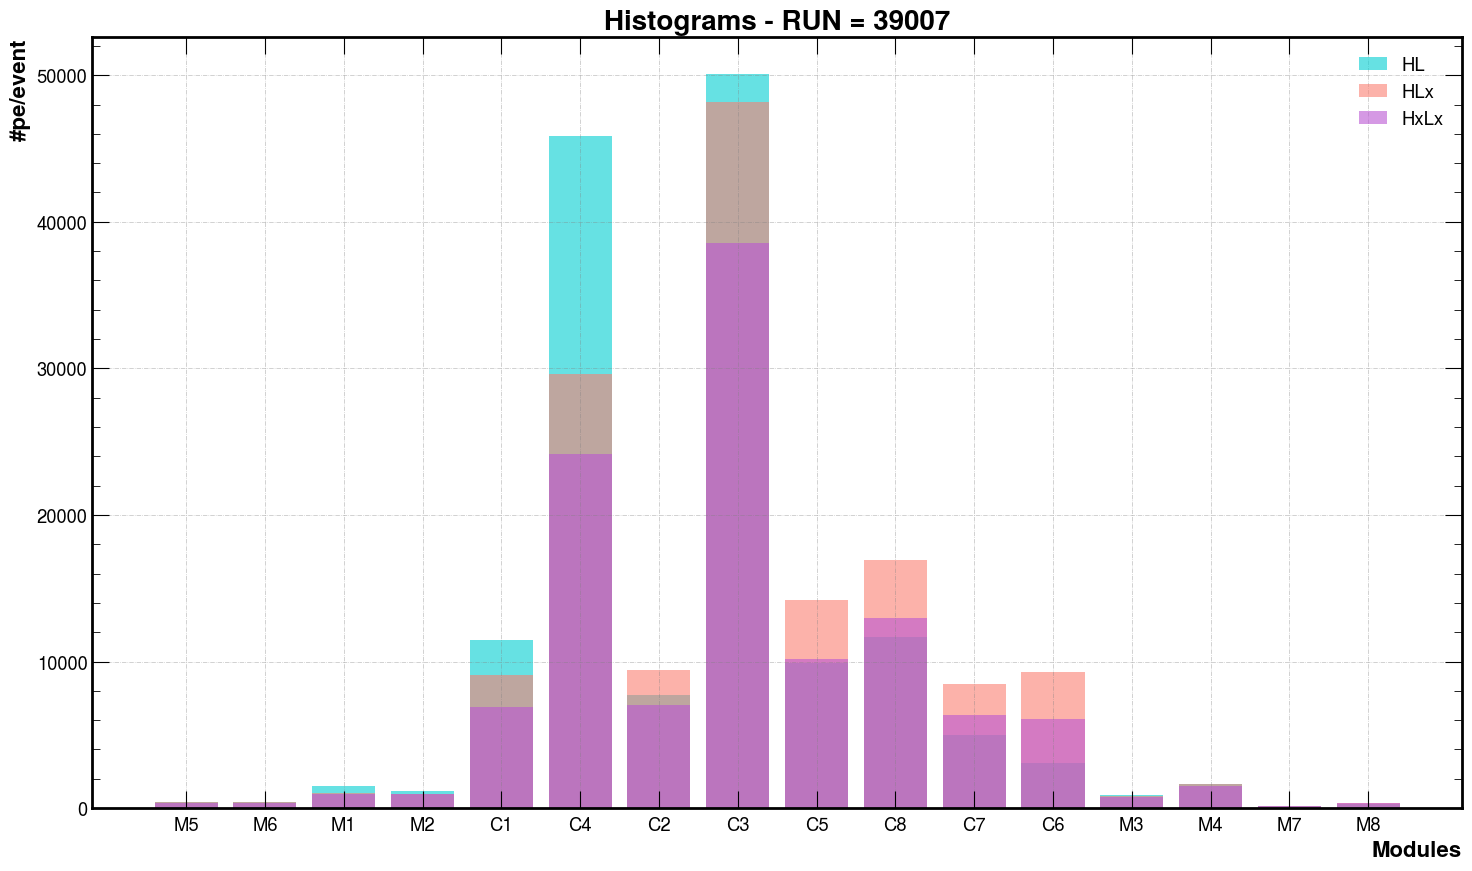

In [8]:
'''
HISTOGRAMS (STAIRS) IN 2D - ALL TRIGGERS FOR THE CHOSEN RUN TOGETHER FOR STATISTICS COMPARISON
'''
plt.figure(figsize=(15,9))
plt.title('Histograms - RUN = {:}'.format(run), fontweight='bold', fontsize=20)
plt.grid(color='gray', linestyle='-.', linewidth=0.5, alpha=0.5)
plt.bar(modules, pes_HL, color='darkturquoise', label='{:}'.format('HL'), alpha=0.6)
plt.bar(modules, pes_HLx, color='salmon', label='{:}'.format('HLx'), alpha=0.6)
plt.bar(modules, pes_HxLx, color='mediumorchid', label='{:}'.format('HxLx'), alpha=0.6)
plt.gca().tick_params(axis='x', which='minor', bottom=False, top=False)
plt.legend()
plt.xlabel('Modules', fontweight='bold')
plt.ylabel('#pe/event', fontweight='bold')
#plt.savefig('/afs/cern.ch/work/l/liacob/public/saturation_hist/{:}_2DTotalHist_bar.png'.format(run))

In [ ]:
'''
MAP of the modules location in the detector on x-y grid
'''

xd=0.75 #x_dimension of the module [m]
yd=0.75 #y_dimension of the module [m]
modules_map = {
    'M1': (-6*xd, 1.5*yd), 'M2': (-5*xd, 1.5*yd), 'M5': (-3*xd, 1.5*yd), 'M6': (-2*xd, 1.5*yd),
    'C1': (1*xd, 1*yd), 'C4': (2*xd, 3*yd), 'C2': (3*xd, 0*yd), 'C3': (4*xd, 2*yd),
    'C5': (5*xd, 1*yd), 'C8': (6*xd, 3*yd), 'C7': (7*xd, 2*yd), 'C6': (7*xd, 0*yd),
    'M3': (11*xd, 1.5*yd), 'M4': (12*xd, 1.5*yd), 'M7': (14*xd, 1.5*yd), 'M8': (15*xd, 1.5*yd),
}

In [ ]:
#Function for 3D plots

def subhist(coord, dz_part, part_type, colors, **kwargs):
    m_map = kwargs.get("m_map", False) #True if you want to plot the map
    elev = kwargs.get("elev", 50)
    azim = kwargs.get("azim", -65)

    # Coord x, y from mapping
    x = [modules_map[m][0] for m in modules]
    y = [modules_map[m][1] for m in modules]
    z = np.zeros(len(modules))  # bars baseline at z=0
    x_dim=np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 8, 8, 8, 8, 8], dtype=object)*xd
    x_dim[:6]=''
    x_dim[16:]=''
    y_dim=np.full(22, '', dtype=object)
    y_dim[[9, 10, 11, 12, 13]]=[0, 1*yd,2*yd,3*yd,4*yd]
    dx = dy = 0.75 #dimensions of the modules
    xticks = np.arange(-6*xd,16*xd,xd)
    yticks = np.arange(-8*yd,14*yd,yd)

    ax = fig.add_subplot(coord, projection='3d')

    #bars
    ax.bar3d(x, y, z, dx, dy, dz_part, color=colors, alpha=0.8, shade=True, zorder=10)
    #(non-tco)
    ax.scatter(0, np.arange(-8*yd, 14*yd, yd), marker='.', color='black', zorder=9)
    ax.text(-3, -5, 0, "NON-TCO", va='center', fontweight='bold', zorder=14)
    ax.scatter(7.5, np.arange(-8*yd, 14*yd, yd), marker='.', color='black', zorder=9)
    ax.text(9.5, -5, 0, "TCO", va='center', fontweight='bold', zorder=14)

    
    ax.set_zlabel('#pe/event', fontweight='bold', labelpad=12.0)       
    ax.xaxis.pane.set_visible(False)
    ax.yaxis.pane.set_visible(False)
    ax.xaxis._axinfo["grid"]['linewidth'] = 0.2
    ax.yaxis._axinfo["grid"]['linewidth'] = 0.2
    ax.set_xlabel('x [m]', fontweight='bold', labelpad=15.0)
    ax.set_ylabel('y [m]', fontweight='bold', labelpad=12.0)
    ax.set_xticks(xticks)
    ax.set_xlim(xticks[0], xticks[-1]+xticks[1]-xticks[0])
    ax.set_xticklabels(np.asarray(x_dim))
    ax.set_yticks(yticks)
    ax.set_ylim(yticks[0], yticks[-1] + xticks[1] - xticks[0])
    ax.set_yticklabels(np.asarray(y_dim))
    ax.xaxis.set_major_locator(plt.FixedLocator(xticks))
    ax.xaxis.set_minor_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.FixedLocator(np.arange(-8*xd,16*xd,xd)))
    ax.yaxis.set_minor_locator(plt.NullLocator())
    ax.view_init(elev=elev, azim=azim)

    ax.tick_params(axis='x', which='minor', bottom=False, top=False)
    ax.tick_params(axis='y', which='minor', bottom=False, top=False)
    ax.tick_params(axis='x', rotation=30)
    ax.tick_params(axis='y', rotation=-10)
    
    if m_map==True:
        ax.set_zlim(-3, 3)
        ax.set_zlabel('', fontweight='bold', labelpad=12.0) 
        ax.yaxis._axinfo["grid"]['linewidth'] = 0
        ax.xaxis._axinfo["grid"]['linewidth'] = 0
        #cathode plane
        x_range = np.arange(-6*xd, 17*xd, xd)
        y_range = np.arange(-8*yd, 15*yd, yd)
        X, Y = np.meshgrid(x_range, y_range)
        Z = np.zeros_like(X)
        ax.plot_surface(X, Y, Z, color='gray', edgecolor='lightgray', alpha=0.05, linewidth=0.4) 
        #beam
        t=np.linspace(-10,10)
        xx=1.7-t
        yy=3+t
        zz=1.1+0.1405*t
        ax.plot(xx, yy, zz, color='red', zorder=12)
        ax.scatter(1.7, 3, 1.1, color='red')
        ax.view_init(elev=elev, azim=azim)
    else:
        ax.set_title('Trigger type: {:}'.format(part_type), fontweight='bold')
        for xi, yi, zi, label in zip(x, y, dz_part, modules):
            ax.text(xi + dx/2, yi + dy/2, zi + zi*0., f'{zi:.0f}', ha='center', va='bottom', fontsize=9, zorder=18)

    for xi, yi, zi, label in zip(x, y, dz_part, modules):
            ax.text(xi + dx/2, yi + dy/2, zi + max(dz_part)*0.1, label, ha='center', va='bottom', zorder=19, fontsize=9, fontweight='bold')

In [ ]:
'''
REPRESENTATIVE MAP OF THE MODULES
'''

fig = plt.figure(figsize=(12, 12))
plt.suptitle('Modules Map', fontweight='bold', fontsize=20)

dz_map=np.zeros(16)
subhist(111, dz_map, '', 'turquoise', m_map=True)

#plt.savefig('/afs/cern.ch/work/l/liacob/public/saturation_hist/{:}_3DMap.png'.format(run))

In [ ]:
'''
HISTOGRAMS IN 3D (LEGO PLOT) - ALL TRIGGERS FOR THE CHOSEN RUN
'''

fig = plt.figure(figsize=(22, 22))
plt.suptitle('Histograms - RUN = {:}'.format(run), fontweight='bold', fontsize=20)

dz_total = pes_total
dz_HL = pes_HL
dz_HLx = pes_HLx
dz_HxLx = pes_HxLx

color_total = ['mediumseagreen'] * len(modules)
color_HL = ['darkturquoise'] * len(modules)
color_HLx = ['salmon'] * len(modules)
color_HxLx = ['mediumorchid'] * len(modules)

elev=35
azim=-65
subhist(221, dz_total, part_total, color_total, elev=elev, azim=azim)
subhist(222, dz_HL, part_HL, color_HL, elev=elev, azim=azim)
subhist(223, dz_HLx, part_HLx, color_HLx, elev=elev, azim=azim)
subhist(224, dz_HxLx, part_HxLx, color_HxLx, elev=elev, azim=azim)
plt.gca().tick_params(axis='x', which='minor', bottom=False, top=False)
plt.gca().tick_params(axis='y', which='minor', bottom=False, top=False)

plt.savefig('/afs/cern.ch/work/h/hvieirad/public/np02_light_response_data/{:}_3DHist.png'.format(run))